<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/GabrielDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ByGabriel.csv to ByGabriel.csv


In [3]:
gabrielDataset_Actual = pd.read_csv(io.BytesIO(uploaded['ByGabriel.csv']))
gabrielDataset_Actual_Copy = gabrielDataset_Actual.copy()
print('Actual shape of dataset before any processing: ',gabrielDataset_Actual_Copy.shape)
actual_Rows = gabrielDataset_Actual_Copy.shape[0]
gabrielDataset_Actual_Copy = gabrielDataset_Actual_Copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',gabrielDataset_Actual_Copy.shape)
rows_AfterDeleting_Duplicates = gabrielDataset_Actual_Copy.shape[0]
print('No.of Duplicate rows in the Gabriel Dataset = ', (actual_Rows - rows_AfterDeleting_Duplicates))

Actual shape of dataset before any processing:  (253680, 22)
Shape of dataset after removing the duplicates:  (229781, 22)
No.of Duplicate rows in the Gabriel Dataset =  23899


In [4]:
# @ Printing Sample Data
gabrielDataset_Actual_Copy.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
gabrielDataset_Actual_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  

In [ ]:
gabrielDataset_Actual_Copy.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
gabrielDataset_Actual_Copy.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

**If the number of unique values of a feature is < 20 then it is categorical feature else it is continous type variable**

Therefore from the above result we can conclude that the features BMI, MentalHealth, GenHealth are of continous type and rest all are of categorical type

Text(0.5, 1.0, 'Diabetes Distribution by Age')

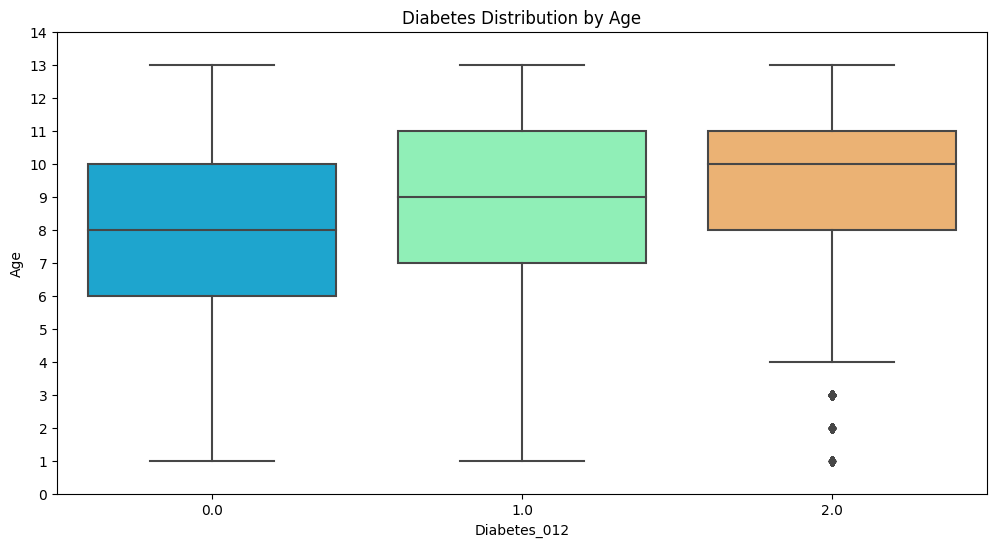

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Diabetes_012',y='Age',data=gabrielDataset_Actual_Copy,palette='rainbow')
plt.yticks(range(0,15))
plt.title('Diabetes Distribution by Age')

Text(0.5, 1.0, 'Diabetes Distribution by Age & High Cholestrol')

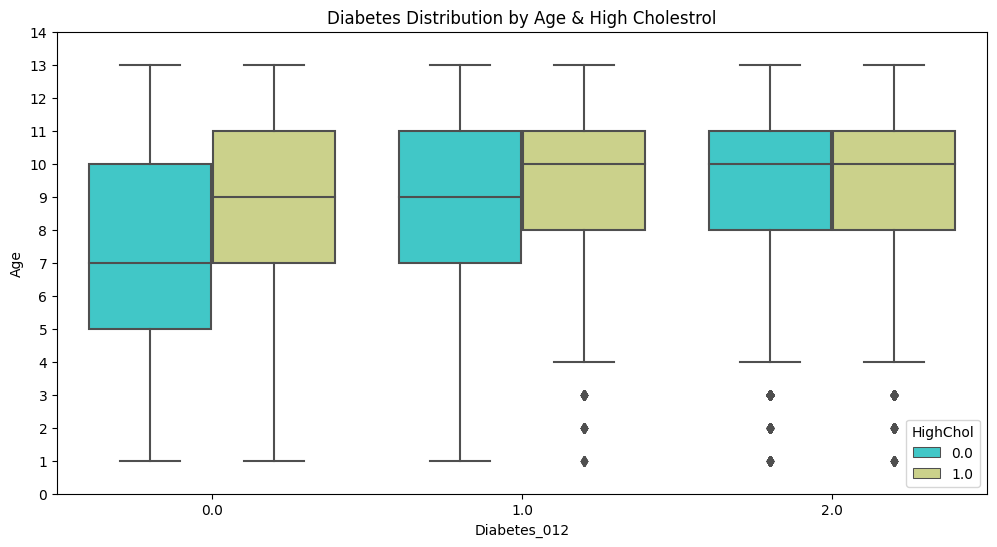

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Diabetes_012',y='Age',data=gabrielDataset_Actual_Copy,palette='rainbow',hue='HighChol')
plt.yticks(range(0,15))
plt.title('Diabetes Distribution by Age & High Cholestrol')

Text(0.5, 1.0, 'Diabetes Distribution by Age & High BP')

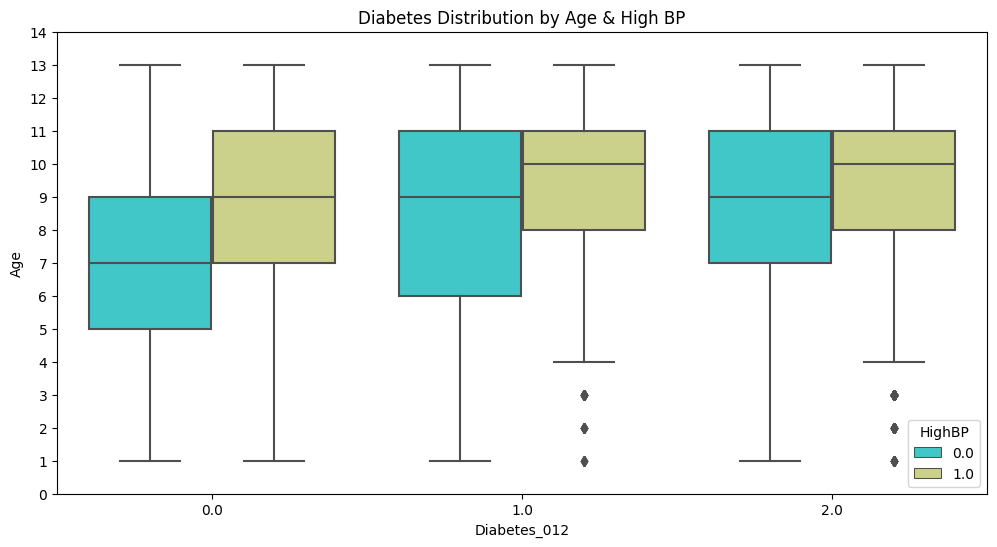

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Diabetes_012',y='Age',data=gabrielDataset_Actual_Copy,palette='rainbow',hue='HighBP')
plt.yticks(range(0,15))
plt.title('Diabetes Distribution by Age & High BP')

Inference from Box plot(Diabetes vs (Age & High Cholestrol):

Text(0.5, 1.0, 'Diabetes Distribution by Age & Sex')

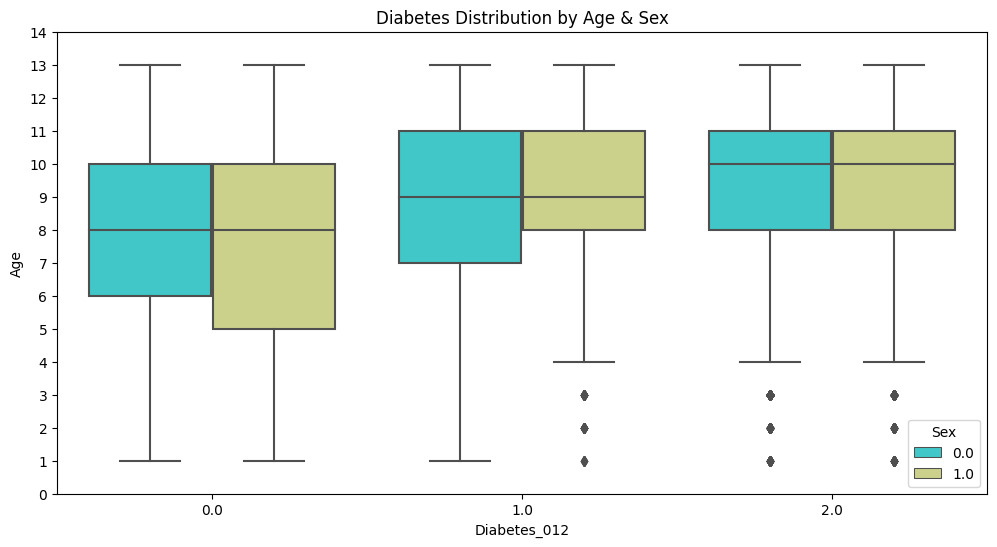

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Diabetes_012',y='Age',data=gabrielDataset_Actual_Copy,palette='rainbow',hue='Sex')
plt.yticks(range(0,15))
plt.title('Diabetes Distribution by Age & Sex')

Text(0.5, 1.0, 'Diabetes Distribution by BMI(Obesity) & Sex')

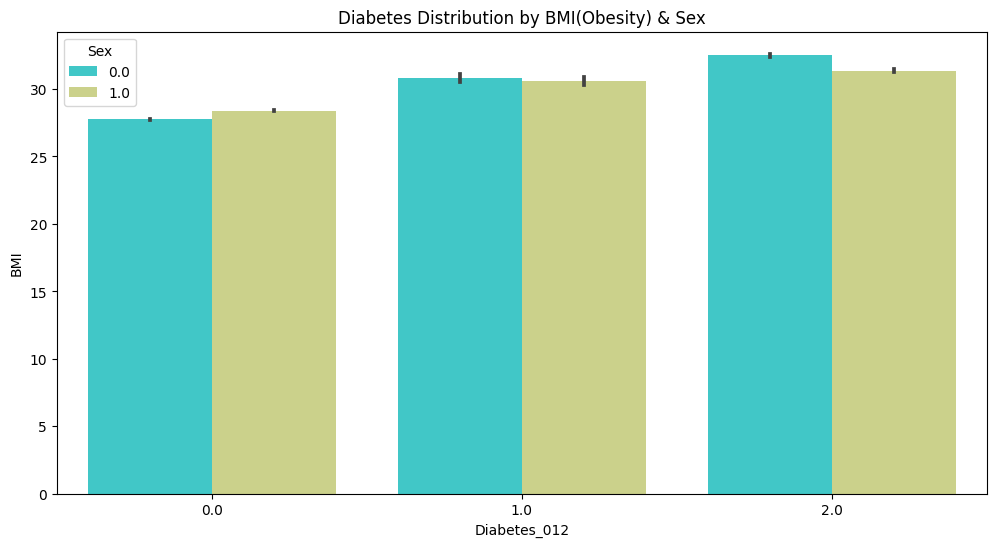

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x='Diabetes_012',y='BMI',data=gabrielDataset_Actual_Copy,palette='rainbow',hue='Sex')
plt.title('Diabetes Distribution by BMI(Obesity) & Sex')